In [1]:
!pip install praw

   ---------------------------------------- 0.0/189.3 kB ? eta -:--:--
   ------ -------------------------------- 30.7/189.3 kB 660.6 kB/s eta 0:00:01
   -------- ------------------------------ 41.0/189.3 kB 393.8 kB/s eta 0:00:01
   ------------------ -------------------- 92.2/189.3 kB 871.5 kB/s eta 0:00:01
   ---------------------------------- --- 174.1/189.3 kB 952.6 kB/s eta 0:00:01
   -------------------------------------- 189.3/189.3 kB 882.3 kB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\anushka\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import praw

In [5]:
reddit=praw.Reddit(client_id='D8cejNSLBb0EtW5zWoe_NA',client_secret='M0J6_E56kq-ndtniMqc3nW6CJNsSRg',user_agent='user')

In [7]:
subs=reddit.subreddit('stockmarket').hot(limit=10)
for iter in subs:
    print(iter.title)

Rate My Portfolio - r/StockMarket Quarterly Thread October 2024
Daily General Discussion and Advice Thread - December 04, 2024
I know it’s not much, but I took my first step into investing!
These are the stocks on my watchlist (12/4)
A short critique of Ray Dalio
Let’s Talk Strategies, Lessons, and Staying in the Game
My Apple stock hit $100k
I Want to Hear Your Thoughts on the Qualities Intel’s Next CEO Should Have and Why
Devon Energy - checking if I am missing anything
Tesla loses bid to restore Elon Musk's $56bn pay package


In [8]:
import pandas as pd

In [9]:
import nltk

In [10]:
sub_reddits=['stockmarket','investing','finance']
store_posts=[]
for sr in sub_reddits:
    sr_obj=reddit.subreddit(sr)
    for post in sr_obj.hot(limit=200):
        store_posts.append({
            'title': post.title,
            'body': post.selftext,
            'upvotes': post.score,
            'comments': post.num_comments,
            'created_at': post.created_utc
        })

In [11]:
df=pd.DataFrame(store_posts)

In [12]:
df.head()

,title,body,upvotes,comments,created_at
0,Rate My Portfolio - r/StockMarket Quarterly Th...,Please use this thread to discuss your portfol...,3,49,1.727773e+09
1,Daily General Discussion and Advice Thread - D...,Have a general question? Want to offer some c...,4,7,1.733306e+09
2,"I know it’s not much, but I took my first step...",Any tips? I’m not trying to put too much in un...,278,29,1.733336e+09
3,These are the stocks on my watchlist (12/4),\n\nHi! I am an ex-prop shop equity trader.\n\...,17,0,1.733322e+09
4,A short critique of Ray Dalio,Ray Dalio has done an absolutely amazing job w...,13,6,1.733321e+09


In [16]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
df=pd.read_csv('reddit_stocks_preproccess.csv')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_title'] = df['title'].apply(preprocess_text)
df['cleaned_body'] = df['body'].fillna('').apply(preprocess_text)

df.to_csv('reddit_stock_data_cleaned.csv', index=False)
print("Data cleaned and saved to 'reddit_stock_data_cleaned.csv'.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anushka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anushka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data cleaned and saved to 'reddit_stock_data_cleaned.csv'.


In [33]:
data=pd.read_csv('reddit_stock_data_cleaned.csv')

In [34]:
data

,title,body,upvotes,comments,created_at,rev_title,rev_body,cleaned_title,cleaned_body
0,Rate My Portfolio - r/StockMarket Quarterly Th...,Please use this thread to discuss your portfol...,3,49,1.727773e+09,rate portfolio rstockmarket quarterly thread o...,please use thread discuss portfolio learn stoc...,rate portfolio rstockmarket quarterly thread o...,please use thread discuss portfolio learn stoc...
1,Daily General Discussion and Advice Thread - D...,Have a general question? Want to offer some c...,4,7,1.733306e+09,daily general discussion advice thread december,general question want offer commentary markets...,daily general discussion advice thread december,general question want offer commentary markets...
2,"I know it’s not much, but I took my first step...",Any tips? I’m not trying to put too much in un...,278,29,1.733336e+09,know much took first step investing,tips im trying put much become educated hysa k...,know much took first step investing,tips im trying put much become educated hysa k...
3,These are the stocks on my watchlist (12/4),\n\nHi! I am an ex-prop shop equity trader.\n\...,17,0,1.733322e+09,stocks watchlist,hi exprop shop equity trader daily watchlist t...,stocks watchlist,hi exprop shop equity trader daily watchlist t...
4,A short critique of Ray Dalio,Ray Dalio has done an absolutely amazing job w...,13,6,1.733321e+09,short critique ray dalio,ray dalio done absolutely amazing job bridgewa...,short critique ray dalio,ray dalio done absolutely amazing job bridgewa...
...,...,...,...,...,...,...,...,...,...
460,What Economic Dangers Is the Bond Market Prici...,NaN,0,1,1.723205e+09,economic dangers bond market pricing wsj,NaN,economic dangers bond market pricing wsj,NaN
461,Brookfield’s trillion — Firm appears to be the...,NaN,28,4,1.723119e+09,brookfields trillion firm appears latest broac...,NaN,brookfields trillion firm appears latest broac...,NaN
462,Adam Tooze: Yen carry trades and the turmoil i...,NaN,35,1,1.722949e+09,adam tooze yen carry trades turmoil global fx ...,NaN,adam tooze yen carry trades turmoil global fx ...,NaN
463,Mapping the price of inflation with a Big Mac.,NaN,184,14,1.722819e+09,mapping price inflation big mac,NaN,mapping price inflation big mac,NaN


In [35]:
data['combined_text'] = data['cleaned_title'] + " " + data['cleaned_body']
data = data[['combined_text', 'upvotes', 'comments']]

In [36]:
data

,combined_text,upvotes,comments
0,rate portfolio rstockmarket quarterly thread o...,3,49
1,daily general discussion advice thread decembe...,4,7
2,know much took first step investing tips im tr...,278,29
3,stocks watchlist hi exprop shop equity trader ...,17,0
4,short critique ray dalio ray dalio done absolu...,13,6
...,...,...,...
460,NaN,0,1
461,NaN,28,4
462,NaN,35,1
463,NaN,184,14


In [37]:
data.isnull().sum()

combined_text    78
upvotes           0
comments          0
dtype: int64

In [38]:
data_new = data.dropna(axis=0)

In [39]:
data_new

,combined_text,upvotes,comments
0,rate portfolio rstockmarket quarterly thread o...,3,49
1,daily general discussion advice thread decembe...,4,7
2,know much took first step investing tips im tr...,278,29
3,stocks watchlist hi exprop shop equity trader ...,17,0
4,short critique ray dalio ray dalio done absolu...,13,6
...,...,...,...
448,moronic monday september weekly questions thre...,10,23
451,moronic monday august weekly questions thread ...,5,29
457,moronic monday august weekly questions thread ...,7,18
458,moronic monday august weekly questions thread ...,7,33


In [40]:
data_new.isnull().sum()

combined_text    0
upvotes          0
comments         0
dtype: int64

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Anushka\AppData\Local\Temp\ipykernel_54120\3557107578.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['comments'],bins=5)


<Axes: xlabel='comments', ylabel='Density'>

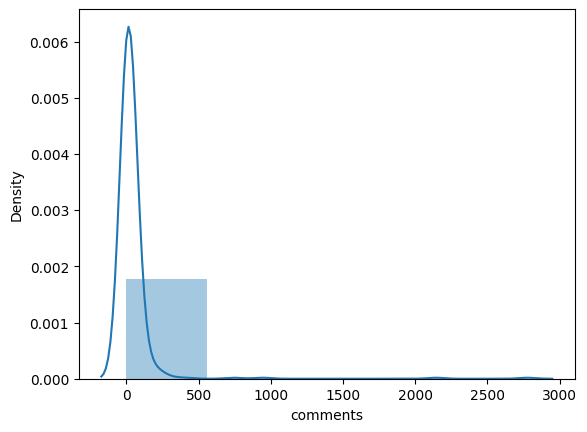

In [45]:
sns.distplot(data_new['comments'],bins=5)

In [47]:
data_new.to_csv('final_stocks.csv',index=False)

In [48]:
from collections import Counter
df=pd.read_csv('final_stocks.csv')
all_words = ' '.join(df['combined_text']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(10))

[('im', 309), ('stocks', 249), ('stock', 227), ('like', 226), ('k', 211), ('would', 193), ('money', 174), ('market', 171), ('need', 152), ('years', 141)]


In [54]:
from textblob import TextBlob

In [53]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 163.8 kB/s eta 0:00:04
   --- ----------------------------------- 61.4/626.3 kB 252.2 kB/s eta 0:00:03
   ------ ------------------------------- 112.6/626.3 kB 409.6 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/626.3 kB 484.3 kB/s eta 0:00:01
   ---------------- --------------------- 266.2/626.3 kB 746.4 kB/s eta 0:00:01
   ------------------------------ --------- 471.0/626.3 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 604.2/626.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.3 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\anushka\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
def sentiment_analyze(text):
    res=TextBlob(text)
    return res.sentiment.polarity
def sentiment_analyze_sub(text):
    res_new=TextBlob(text)
    return res_new.sentiment.subjectivity

In [56]:
df.head()

,combined_text,upvotes,comments
0,rate portfolio rstockmarket quarterly thread o...,3,49
1,daily general discussion advice thread decembe...,4,7
2,know much took first step investing tips im tr...,278,29
3,stocks watchlist hi exprop shop equity trader ...,17,0
4,short critique ray dalio ray dalio done absolu...,13,6


In [65]:
df['polarity_of_text']=df['combined_text'].apply(sentiment_analyze)
df['subjectivity_of_text']=df['combined_text'].apply(sentiment_analyze_sub)

In [66]:
df.head()

,combined_text,upvotes,comments,sentiment_of_text,polarity_of_text,subjectivity_of_text
0,rate portfolio rstockmarket quarterly thread o...,3,49,0.133333,0.000000,0.133333
1,daily general discussion advice thread decembe...,4,7,0.292333,0.132788,0.292333
2,know much took first step investing tips im tr...,278,29,0.355952,0.150397,0.355952
3,stocks watchlist hi exprop shop equity trader ...,17,0,0.380051,0.056029,0.380051
4,short critique ray dalio ray dalio done absolu...,13,6,0.473409,0.116742,0.473409


In [68]:
df=df.drop(columns='sentiment_of_text')

In [69]:
df

,combined_text,upvotes,comments,polarity_of_text,subjectivity_of_text
0,rate portfolio rstockmarket quarterly thread o...,3,49,0.000000,0.133333
1,daily general discussion advice thread decembe...,4,7,0.132788,0.292333
2,know much took first step investing tips im tr...,278,29,0.150397,0.355952
3,stocks watchlist hi exprop shop equity trader ...,17,0,0.056029,0.380051
4,short critique ray dalio ray dalio done absolu...,13,6,0.116742,0.473409
...,...,...,...,...,...
382,moronic monday september weekly questions thre...,10,23,0.090000,0.340000
383,moronic monday august weekly questions thread ...,5,29,0.090000,0.340000
384,moronic monday august weekly questions thread ...,7,18,0.090000,0.340000
385,moronic monday august weekly questions thread ...,7,33,0.090000,0.340000


C:\Users\Anushka\AppData\Local\Temp\ipykernel_54120\557761830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['polarity_of_text'],bins=5)


<Axes: xlabel='polarity_of_text', ylabel='Density'>

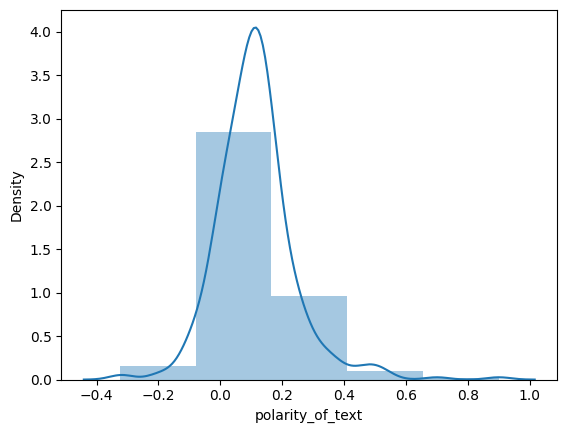

In [71]:
sns.distplot(df['polarity_of_text'],bins=5)

C:\Users\Anushka\AppData\Local\Temp\ipykernel_54120\2003522394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['subjectivity_of_text'],bins=5)


<Axes: xlabel='subjectivity_of_text', ylabel='Density'>

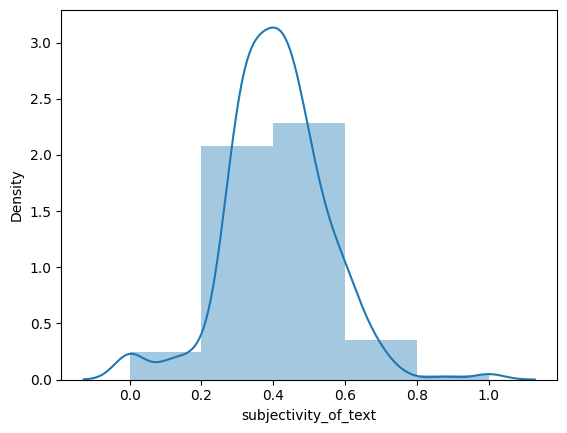

In [72]:
sns.distplot(df['subjectivity_of_text'],bins=5)

In [73]:
df.to_csv('reddit_stock_sentiment.csv',index=False)